## Linear regression implementation using tensorflow

In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Model parameters
learning_rate = 0.05
n_epochs = 1000
display_step = 100

# random number generator
rng = np.random

In [3]:
# Training Data
X_train = np.asarray([rng.uniform(0,1) for x in np.arange(20)])
y_train = X_train * 10 + 20 + np.asarray([rng.uniform(0,1) for x in np.arange(20)])
n = X_train.shape[0]

In [4]:
# Tensorflow graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
y_pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Root Mean squared error
cost = tf.sqrt(tf.reduce_sum(tf.pow(y_pred-Y, 2))/(2*n))

# Optimize cost function by using gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initializing the variables
init = tf.global_variables_initializer()

In [8]:
# Launch the graph
sess = tf.InteractiveSession()
sess.run(init)

# Fit all training data
for epoch in range(n_epochs):
    for (x, y) in zip(X_train, y_train):
        sess.run(optimizer, feed_dict={X: x,Y:y})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: X_train,Y: y_train})
        print("Epoch:", '%04d' % (epoch+1), "cost:", "{:.9f}".format(c), \
            "W:", sess.run(W), "b:", sess.run(b))

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: X_train,Y: y_train})
print("Cost: ", training_cost, "W: ", sess.run(W), "b: ", sess.run(b), '\n')

Epoch: 0100 cost: 4.098116875 W: 7.46731 b: 15.7404
Epoch: 0200 cost: 0.212142140 W: 9.438 b: 20.6579
Epoch: 0300 cost: 0.212138489 W: 9.43804 b: 20.6579
Epoch: 0400 cost: 0.212134928 W: 9.43808 b: 20.6579
Epoch: 0500 cost: 0.215454414 W: 9.42734 b: 20.6421
Epoch: 0600 cost: 0.212461412 W: 9.43466 b: 20.6579
Epoch: 0700 cost: 0.212457731 W: 9.4347 b: 20.6579
Epoch: 0800 cost: 0.212454036 W: 9.43474 b: 20.6579
Epoch: 0900 cost: 0.212450251 W: 9.43478 b: 20.6579
Epoch: 1000 cost: 0.212446719 W: 9.43481 b: 20.6579
Optimization Finished!
Cost:  0.212447 W:  9.43481 b:  20.6579 



As we can see, I have generated data with weight = 10 and bias = 20. I got the same parameters with linear regression. I did not get the exact parameters because I added random noise in the data

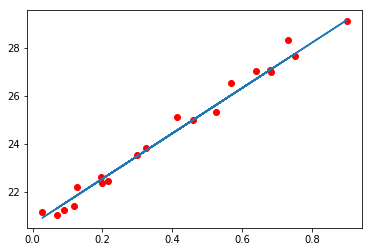

In [9]:
# Regression model
plt.plot(X_train, y_train, 'ro', label='Train data')
plt.plot(X_train, sess.run(W) * X_train + sess.run(b))
plt.show()

## Test the model

In [10]:
# Testing examples
X_test = np.asarray([rng.uniform(0,1) for x in np.arange(20)])
y_test = X_test * 10 + 20 + np.asarray([rng.uniform(0,1) for x in np.arange(20)])

In [11]:
test_error = sess.run( tf.sqrt(tf.reduce_sum(tf.pow(y_pred - Y, 2)) / (2 * X_test.shape[0])),feed_dict={X: X_test, Y: y_test})  # same function as cost above
print("Root mean squared error: ", test_error)

Root mean squared error:  0.261005


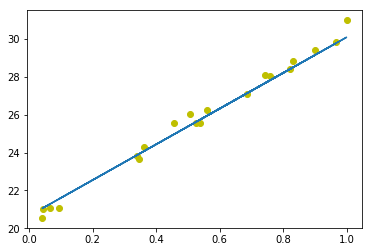

In [12]:
plt.plot(X_test, y_test, 'yo', label='Test data')
plt.plot(X_test, sess.run(W) * X_test + sess.run(b))
plt.show()